In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df=pd.read_csv("~/Downloads/fraudTest.csv")

In [10]:
df.shape

(555719, 23)

In [11]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [13]:
#### Data Cleaning and Feature Engineering

In [14]:
df.cc_num.value_counts()

6538441737335434       1474
4586810168620942       1466
4745996322265          1462
4587657402165341815    1458
2242542703101233       1428
                       ... 
4883407061576             9
4087542780207162          9
3540416671210051          8
4352307151555405069       7
4295296907373             6
Name: cc_num, Length: 924, dtype: int64

In [15]:
df.merchant.value_counts()

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: merchant, Length: 693, dtype: int64

In [16]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#### Dropping irrelevant columns

In [17]:
df.drop(columns='Unnamed: 0',inplace=True)

#### cc_num, zip, unix_time shall be Categorical Variable

In [18]:
df.cc_num=df.cc_num.astype('object')

In [19]:
df.zip=df.zip.astype('object')

In [20]:
df.unix_time=df.unix_time.astype('object')

In [21]:
num_cols= df.select_dtypes(include=np.number)
cat_cols=df.select_dtypes(include=object)

In [22]:
num_cols.head(2)

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0


In [23]:
# num_cols.unix_time.value_counts()

In [24]:
# df.groupby(['first'])['cc_num'].count()

In [25]:
#### Joining first and last to get the customer name

In [26]:
df['Customer_Name']=df['first']+' '+df['last']

In [27]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams


In [28]:
df.drop(columns=['first','last'],inplace=True)

In [29]:
df.groupby(['Customer_Name'])['cc_num'].count()

Customer_Name
Aaron Murray        870
Aaron Pena          715
Aaron Rogers        233
Aaron Stewart       200
Adam Keller         222
                   ... 
William Thompson    875
Willie Jordan       425
Xavier Beltran      681
Zachary Allen       673
Zachary Boone       240
Name: cc_num, Length: 917, dtype: int64

In [30]:
cat_cols=df.select_dtypes(include=object)

In [31]:
cat_cols.head(2)

,trans_date_trans_time,cc_num,merchant,category,gender,street,city,state,zip,job,dob,trans_num,unix_time,Customer_Name
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,M,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,Jeff Elliott
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,F,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,Joanne Williams


#### Splitting dob column into day, month, year to get the age of the customer

In [32]:
a=df['dob'].str

In [33]:
a=a.split(expand=True,pat='-')

In [34]:
a.columns=['Year','Month','Day']

In [35]:
a.head()

,Year,Month,Day
0,1968,03,19
1,1990,01,17
2,1970,10,21
3,1987,07,25
4,1955,07,06


In [36]:
# pd.concat([df,a],join='inner')

In [37]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams


In [38]:
a.head()

,Year,Month,Day
0,1968,03,19
1,1990,01,17
2,1970,10,21
3,1987,07,25
4,1955,07,06


In [39]:
df[['Year','Month','Day']]=a

In [40]:
df.drop(columns='dob',inplace=True)

In [41]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Year,Month,Day
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,1968,03,19
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,1990,01,17


#### Coverting the Year Column to Integer datatype and subtracting it by 2023 to get the Age of the Customer.

In [42]:
df['Year']=df.Year.astype('int')

In [43]:
df['Age_Cust']=2023-df['Year']

In [44]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Year,Month,Day,Age_Cust
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,1968,03,19,55
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,1990,01,17,33


In [45]:
df.drop(columns=['Year','Month','Day'],inplace=True)

In [46]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33


In [47]:
# df.info()

In [48]:
## Splitting trans_date_trans_time into Trans_date and Trans_time

In [49]:
df[['trans_date','trans_time']]=df['trans_date_trans_time'].str.split(expand=True)

In [50]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust,trans_date,trans_time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33,2020-06-21,12:14:33


In [51]:
df['trans_date'].value_counts()

2020-11-30    6530
2020-12-07    6506
2020-12-14    6400
2020-12-21    6390
2020-12-28    6321
              ... 
2020-09-23    1494
2020-11-25    1488
2020-09-09    1479
2020-09-16    1465
2020-11-18    1460
Name: trans_date, Length: 194, dtype: int64

In [52]:
df['trans_time'].value_counts()

17:47:40    21
16:11:17    21
22:20:54    21
14:28:33    21
12:07:14    20
            ..
11:58:08     1
09:35:34     1
01:06:09     1
10:21:14     1
11:19:39     1
Name: trans_time, Length: 86092, dtype: int64

## Splitting trans_date into Year, Month, Day

In [53]:
df[['trans_year','trans_month','trans_day']]=df['trans_date'].str.split(expand=True,pat='-')

In [54]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust,trans_date,trans_time,trans_year,trans_month,trans_day
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55,2020-06-21,12:14:25,2020,06,21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33,2020-06-21,12:14:33,2020,06,21


In [55]:
df.drop(columns=['trans_date_trans_time','trans_date'],inplace=True)

In [56]:
df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust,trans_time,trans_year,trans_month,trans_day
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55,12:14:25,2020,06,21
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33,12:14:33,2020,06,21


In [57]:
# df['street'].value_counts()

In [58]:
num_cols= df.select_dtypes(include=np.number)
cat_cols=df.select_dtypes(include=object)

In [59]:
num_cols.head(2)

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,Age_Cust
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,55
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,33


In [60]:
cat_cols.head(2)

,cc_num,merchant,category,gender,street,city,state,zip,job,trans_num,unix_time,Customer_Name,trans_time,trans_year,trans_month,trans_day
0,2291163933867244,fraud_Kirlin and Sons,personal_care,M,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,Jeff Elliott,12:14:25,2020,06,21
1,3573030041201292,fraud_Sporer-Keebler,personal_care,F,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,Joanne Williams,12:14:33,2020,06,21


#### As trans_time is given in 24 hour format, splitting it and taking only the Hours Column.

In [61]:
df[['Hours','Minute','Second']]=df['trans_time'].str.split(expand=True,pat=':')

In [62]:
df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust,trans_time,trans_year,trans_month,trans_day,Hours,Minute,Second
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55,12:14:25,2020,06,21,12,14,25
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33,12:14:33,2020,06,21,12,14,33


In [63]:
df.drop(columns=['trans_time','Minute','Second'],inplace=True)

In [64]:
df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust,trans_year,trans_month,trans_day,Hours
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55,2020,06,21,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33,2020,06,21,12


In [65]:
num_cols= df.select_dtypes(include=np.number)
cat_cols=df.select_dtypes(include=object)

In [66]:
num_cols.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,Age_Cust
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,55
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,33
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,53
3,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,36
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,68


In [67]:
cat_cols.head()

,cc_num,merchant,category,gender,street,city,state,zip,job,trans_num,unix_time,Customer_Name,trans_year,trans_month,trans_day,Hours
0,2291163933867244,fraud_Kirlin and Sons,personal_care,M,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,Jeff Elliott,2020,06,21,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,F,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,Joanne Williams,2020,06,21,12
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,9333 Valentine Point,Bellmore,NY,11710,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,Ashley Lopez,2020,06,21,12
3,3591919803438423,fraud_Haley Group,misc_pos,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,Brian Williams,2020,06,21,12
4,3526826139003047,fraud_Johnston-Casper,travel,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,Furniture designer,57ff021bd3f328f8738bb535c302a31b,1371816917,Nathan Massey,2020,06,21,12


In [68]:
df.rename(columns={'Hours':'trans_time_24hr'},inplace=True)

In [69]:
df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Customer_Name,Age_Cust,trans_year,trans_month,trans_day,trans_time_24hr
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott,55,2020,06,21,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams,33,2020,06,21,12


In [70]:
cat_cols.head(2)

,cc_num,merchant,category,gender,street,city,state,zip,job,trans_num,unix_time,Customer_Name,trans_year,trans_month,trans_day,Hours
0,2291163933867244,fraud_Kirlin and Sons,personal_care,M,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,Jeff Elliott,2020,06,21,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,F,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,Joanne Williams,2020,06,21,12


#### Customer Name would not have impact on Fraud and uniques identity is represented by cc_num

In [71]:
# df.drop(columns='Customer_Name',inplace=True)

#### trans_num would also not have impact on Fraud
#### unix_time would also not have impact on Fraud

In [72]:
df.drop(columns=['Customer_Name','unix_time','trans_num'],inplace=True)


In [73]:
num_cols= df.select_dtypes(include=np.number)
cat_cols=df.select_dtypes(include=object)

In [74]:
cat_cols.head(3)

,cc_num,merchant,category,gender,street,city,state,zip,job,trans_year,trans_month,trans_day,trans_time_24hr
0,2291163933867244,fraud_Kirlin and Sons,personal_care,M,351 Darlene Green,Columbia,SC,29209,Mechanical engineer,2020,06,21,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,F,3638 Marsh Union,Altonah,UT,84002,"Sales professional, IT",2020,06,21,12
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,9333 Valentine Point,Bellmore,NY,11710,"Librarian, public",2020,06,21,12


## Encoding for categorical Columns

#### Using Frequency Encoding

In [75]:
cat_cols=cat_cols.columns

In [76]:
# a=df['cc_num'].value_counts(normalize=True).to_dict()

In [77]:
# df['cc_num']=df['cc_num'].replace(a)

In [78]:
# df.head()

In [79]:
# for i in cat_cols:
#     df[i]=df[i].replace(df[i].value_counts(normalize=True).to_dict())
    

In [80]:
df.head(3)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,Age_Cust,trans_year,trans_month,trans_day,trans_time_24hr
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,55,2020,06,21,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,33,2020,06,21,12
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,53,2020,06,21,12


In [81]:
cat_cols

Index(['cc_num', 'merchant', 'category', 'gender', 'street', 'city', 'state',
       'zip', 'job', 'trans_year', 'trans_month', 'trans_day',
       'trans_time_24hr'],
      dtype='object')

In [82]:
cat_cols1=['cc_num', 'merchant', 'category', 'gender', 'street', 'city', 'state']

In [83]:
cat_cols2=['zip', 'job', 'trans_year', 'trans_month', 'trans_day','trans_time_24hr']

In [84]:
for i in cat_cols1:
    df[i]=df[i].replace(df[i].value_counts(normalize=True).to_dict())

In [85]:
for i in cat_cols2:
    df[i]=df[i].replace(df[i].value_counts(normalize=True).to_dict())

In [86]:
# cat_cols

In [87]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,Age_Cust,trans_year,trans_month,trans_day,trans_time_24hr
0,0.001152,0.001324,0.070768,2.86,0.451367,0.001152,0.001152,0.022567,0.001152,33.9659,-80.9355,333497,0.004373,33.986391,-81.200714,0,55,1.0,0.054088,0.038061,0.050452
1,0.001506,0.001413,0.070768,29.84,0.548633,0.001506,0.001506,0.008382,0.001506,40.3207,-110.4360,302,0.004562,39.450498,-109.960431,0,33,1.0,0.054088,0.038061,0.050452
2,0.001931,0.001359,0.065994,41.28,0.548633,0.001931,0.001931,0.064633,0.001931,40.6729,-73.5365,34496,0.004655,40.495810,-74.196111,0,53,1.0,0.054088,0.038061,0.050452
3,0.001193,0.001279,0.062215,60.05,0.451367,0.001193,0.001193,0.032578,0.001193,28.5697,-80.8191,54767,0.001193,28.812398,-80.883061,0,36,1.0,0.054088,0.038061,0.050452
4,0.001603,0.000666,0.031399,3.19,0.451367,0.001603,0.001603,0.035397,0.001603,44.2529,-85.0170,1126,0.001603,44.959148,-85.884734,0,68,1.0,0.054088,0.038061,0.050452


### Scaling Numerical Columns

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
mms=MinMaxScaler()

In [90]:
num_cols=num_cols.columns

In [91]:
num_cols

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'Age_Cust'],
      dtype='object')

In [92]:
num_cols1=['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long','Age_Cust']

In [93]:
for i in num_cols1:
    df[i] = mms.fit_transform(pd.DataFrame(df[i]))

In [94]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,Age_Cust,trans_year,trans_month,trans_day,trans_time_24hr
0,0.001152,0.001324,0.070768,0.000082,0.451367,0.001152,0.001152,0.022567,0.001152,0.305255,0.867121,0.114727,0.004373,0.313922,0.857112,0,0.456790,1.0,0.054088,0.038061,0.050452
1,0.001506,0.001413,0.070768,0.001267,0.548633,0.001506,0.001506,0.008382,0.001506,0.444423,0.565239,0.000096,0.004562,0.428589,0.568706,0,0.185185,1.0,0.054088,0.038061,0.050452
2,0.001931,0.001359,0.065994,0.001769,0.548633,0.001931,0.001931,0.064633,0.001931,0.452136,0.942836,0.011860,0.004655,0.450526,0.927355,0,0.432099,1.0,0.054088,0.038061,0.050452
3,0.001193,0.001279,0.062215,0.002594,0.451367,0.001193,0.001193,0.032578,0.001193,0.187080,0.868312,0.018834,0.001193,0.205343,0.860298,0,0.222222,1.0,0.054088,0.038061,0.050452
4,0.001603,0.000666,0.031399,0.000096,0.451367,0.001603,0.001603,0.035397,0.001603,0.530537,0.825355,0.000379,0.001603,0.544191,0.810140,0,0.617284,1.0,0.054088,0.038061,0.050452


#### All the transactions have happened in the same year

In [95]:
df['trans_year'].value_counts()

1.0    555719
Name: trans_year, dtype: int64

# Train Test Split

In [96]:
x=df.drop(columns=['is_fraud'])
y=df['is_fraud']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y, random_state=2)

In [99]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(444575, 20) (111144, 20) (444575,) (111144,)


In [100]:
y.value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

In [101]:
y_train.value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

In [102]:
y_test.value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

# Base Model

In [103]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)
X_test=sm.add_constant(x_test)

In [104]:
base_model=sm.Logit(y_train,X_train).fit()

         Current function value: 0.022425
         Iterations: 35


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444575
Model:                          Logit   Df Residuals:                   444556
Method:                           MLE   Df Model:                           18
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.1137
Time:                        03:02:08   Log-Likelihood:                -9969.7
converged:                      False   LL-Null:                       -11249.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
cc_num           4164.3333        nan        nan        nan         nan         nan
merchant          129.8898    120.190      1.081      0.280    -105.678     365.458
category            6.7920      2.613      2.599      0.009       1.670      11.914
amt                45.5628      1.146     39.772      0.000      43.317      47.808
gender              2.5963      0.520      4.993      0.000       1.577       3.615
street           4164.3333        nan        nan        nan         nan         nan
city              169.2691     48.107      3.519      0.000      74.981     263.557
state              -1.0034      1.369     -0.733      0.463      -3.686       1.679
zip             -9820.6375   2907.685     -3.377      0.001   -1.55e+04   -4121.681
lat                 0.3981      2.003      0.199      0.842      -3.527       4.324
long                7.9556      3.045      2.613      0.009       1.988      13.923
city_pop           -1.4382      0.367     -3.916      0.000      -2.158      -0.718
job                36.5230     16.484      2.216      0.027       4.216      68.830
merch_lat           0.3553      2.079      0.171      0.864      -3.720       4.431
merch_long         -8.2074      2.807     -2.924      0.003     -13.709      -2.706
Age_Cust           -0.3495      0.119     -2.948      0.003      -0.582      -0.117
trans_year         -4.4650      0.062    -71.852      0.000      -4.587      -4.343
trans_month        -6.2897      0.507    -12.394      0.000      -7.284      -5.295
trans_day         -39.2696      5.464     -7.188      0.000     -49.978     -28.561
trans_time_24hr     8.8981      2.789      3.190      0.001       3.432      14.365
===================================================================================
"""

In [106]:
# base_model.predict(X_test)

In [123]:
y_pred_prob=base_model.predict(X_test)

In [124]:
y_pred_prob

410685    0.000957
228260    0.005110
357513    0.003325
507633    0.001437
105822    0.001524
            ...   
295334    0.001708
268118    0.005236
3172      0.016655
505316    0.001154
341685    0.005367
Length: 111144, dtype: float64

In [109]:
# Calculating y_pred by assigning values based on threshhold value.

y_pred=np.where(y_pred_prob>0.5,1,0)

### Importing different metrics

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, classification_report, f1_score, cohen_kappa_score

In [111]:
def scores(actual, predicted): 
    print('Confusion Matrix:\n', confusion_matrix(actual,predicted))
    print('Accuracy: ', accuracy_score(actual,predicted))
    print('Recall: ', recall_score(actual,predicted))
    print('Precision: ', precision_score(actual,predicted))
    print('F1 score: ', f1_score(actual,predicted))
    print('Cohen Kappa Score:',cohen_kappa_score(actual,predicted))
    print('Classification Summary:\n ', classification_report(actual,predicted))

In [112]:
scores(y_test,y_pred)

Confusion Matrix:
 [[110681     34]
 [   429      0]]
Accuracy:  0.9958342330670121
Recall:  0.0
Precision:  0.0
F1 score:  0.0
Cohen Kappa Score: -0.0005672120628810173
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



# ROC Curve

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve

In [114]:
def roc_new(actual,pred_prob):
    fpr,tpr,thres=roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr, color='r')
    plt.plot([0,1],[0,1],ls='--', color='b')
    plt.xlabel(f'FPR, AUC: {round(roc_auc_score(actual,pred_prob),2)}')
    plt.ylabel('TPR')
    plt.show()

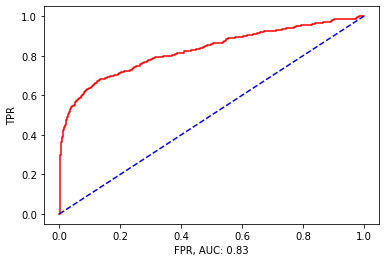

In [115]:
roc_new(y_test,y_pred_prob)

In [116]:
# Changing the Threshhold Value

In [117]:
y_pred_55=np.where(y_pred_prob>0.55,1,0)

In [118]:
scores(y_test,y_pred_55)

Confusion Matrix:
 [[110684     31]
 [   429      0]]
Accuracy:  0.9958612250773771
Recall:  0.0
Precision:  0.0
F1 score:  0.0
Cohen Kappa Score: -0.0005205124529052974
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [119]:
# threshold=0.37

In [120]:
y_pred_37=np.where(y_pred_prob>0.37,1,0)

In [121]:
scores(y_test,y_pred_37)

Confusion Matrix:
 [[110677     38]
 [   429      0]]
Accuracy:  0.9957982437198589
Recall:  0.0
Precision:  0.0
F1 score:  0.0
Cohen Kappa Score: -0.000628551506869357
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



# Balancing the Dataset

In [412]:
from imblearn.over_sampling import SMOTE

In [413]:
over_samp=SMOTE()

In [414]:
x_train_os,y_train_os=over_samp.fit_resample(x_train,y_train)

In [415]:
y_train_os.value_counts()

0    442859
1    442859
Name: is_fraud, dtype: int64

In [416]:
y_train_os.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

# Logistic Regression(sklearn)

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
model_lr = LogisticRegression()

In [419]:
model_lr.fit(x_train_os,y_train_os)

LogisticRegression()

In [420]:
y_pred_lr=model_lr.predict(x_test)

In [421]:
scores(y_test,y_pred_lr)

Confusion Matrix:
 [[105472   5243]
 [   115    314]]
Accuracy:  0.9517922694882315
Recall:  0.7319347319347319
Precision:  0.05650530861975886
F1 score:  0.10491146007350484
Cohen Kappa Score: 0.09845053792481595
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.95      0.98    110715
           1       0.06      0.73      0.10       429

    accuracy                           0.95    111144
   macro avg       0.53      0.84      0.54    111144
weighted avg       1.00      0.95      0.97    111144



In [422]:
# Probabilities

In [423]:
y_pred_lr_prob = model_lr.predict_proba(x_test)[:,1]

In [424]:
y_pred_lr_prob

array([0.42318376, 0.23869198, 0.50633   , ..., 0.43699687, 0.17788927,
       0.22848702])

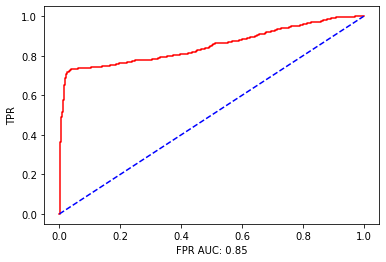

In [426]:
roc_new(y_test,y_pred_lr_prob)

# KNN Model

In [427]:
from sklearn.neighbors import KNeighborsClassifier

In [428]:
model_knn=KNeighborsClassifier(n_neighbors=7)

In [429]:
model_knn.fit(x_train_os,y_train_os)

KNeighborsClassifier(n_neighbors=7)

In [430]:
y_pred_knn=model_knn.predict(x_test)

In [431]:
scores(y_test,y_pred_knn)

Confusion Matrix:
 [[109681   1034]
 [   125    304]]
Accuracy:  0.989572086662348
Recall:  0.7086247086247086
Precision:  0.22720478325859492
F1 score:  0.34408602150537637
Cohen Kappa Score: 0.34022933953162604
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.99      0.99    110715
           1       0.23      0.71      0.34       429

    accuracy                           0.99    111144
   macro avg       0.61      0.85      0.67    111144
weighted avg       1.00      0.99      0.99    111144



In [432]:
y_pred_prob_knn=model_knn.predict_proba(x_test)[:,1]

In [433]:
y_pred_prob_knn

array([0., 0., 0., ..., 0., 0., 0.])

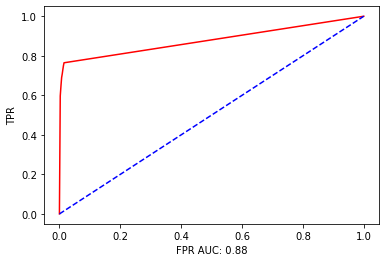

In [435]:
roc_new(y_test,y_pred_prob_knn)

# Naive Bayes Model

In [439]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [440]:
model_nb = GaussianNB()

In [441]:
model_nb.fit(x_train_os,y_train_os)

GaussianNB()

In [442]:
y_pred_nb=model_nb.predict(x_test)

In [443]:
y_pred_nb

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [444]:
y_pred_nb_prob=model_nb.predict_proba(x_test)[:,1]

In [445]:
y_pred_nb_prob

array([9.30422334e-03, 1.09929231e-01, 1.31757309e-04, ...,
       7.69320219e-01, 1.22191770e-02, 4.28467949e-02])

In [446]:
scores(y_test,y_pred_nb)

Confusion Matrix:
 [[92555 18160]
 [  111   318]]
Accuracy:  0.8356096595407759
Recall:  0.7412587412587412
Precision:  0.01720965472453729
F1 score:  0.033638335008198024
Cohen Kappa Score: 0.02629214295285054
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.84      0.91    110715
           1       0.02      0.74      0.03       429

    accuracy                           0.84    111144
   macro avg       0.51      0.79      0.47    111144
weighted avg       1.00      0.84      0.91    111144



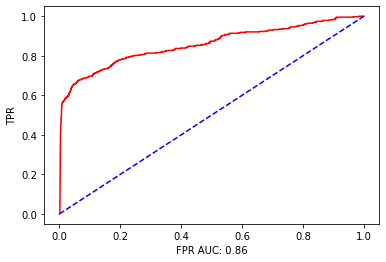

In [447]:
roc_new(y_test,y_pred_nb_prob)

# Decision Tree

In [449]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [450]:
model_dt=DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [451]:
model_dt.fit(x_train_os,y_train_os)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [452]:
y_pred_dt=model_dt.predict(x_test)

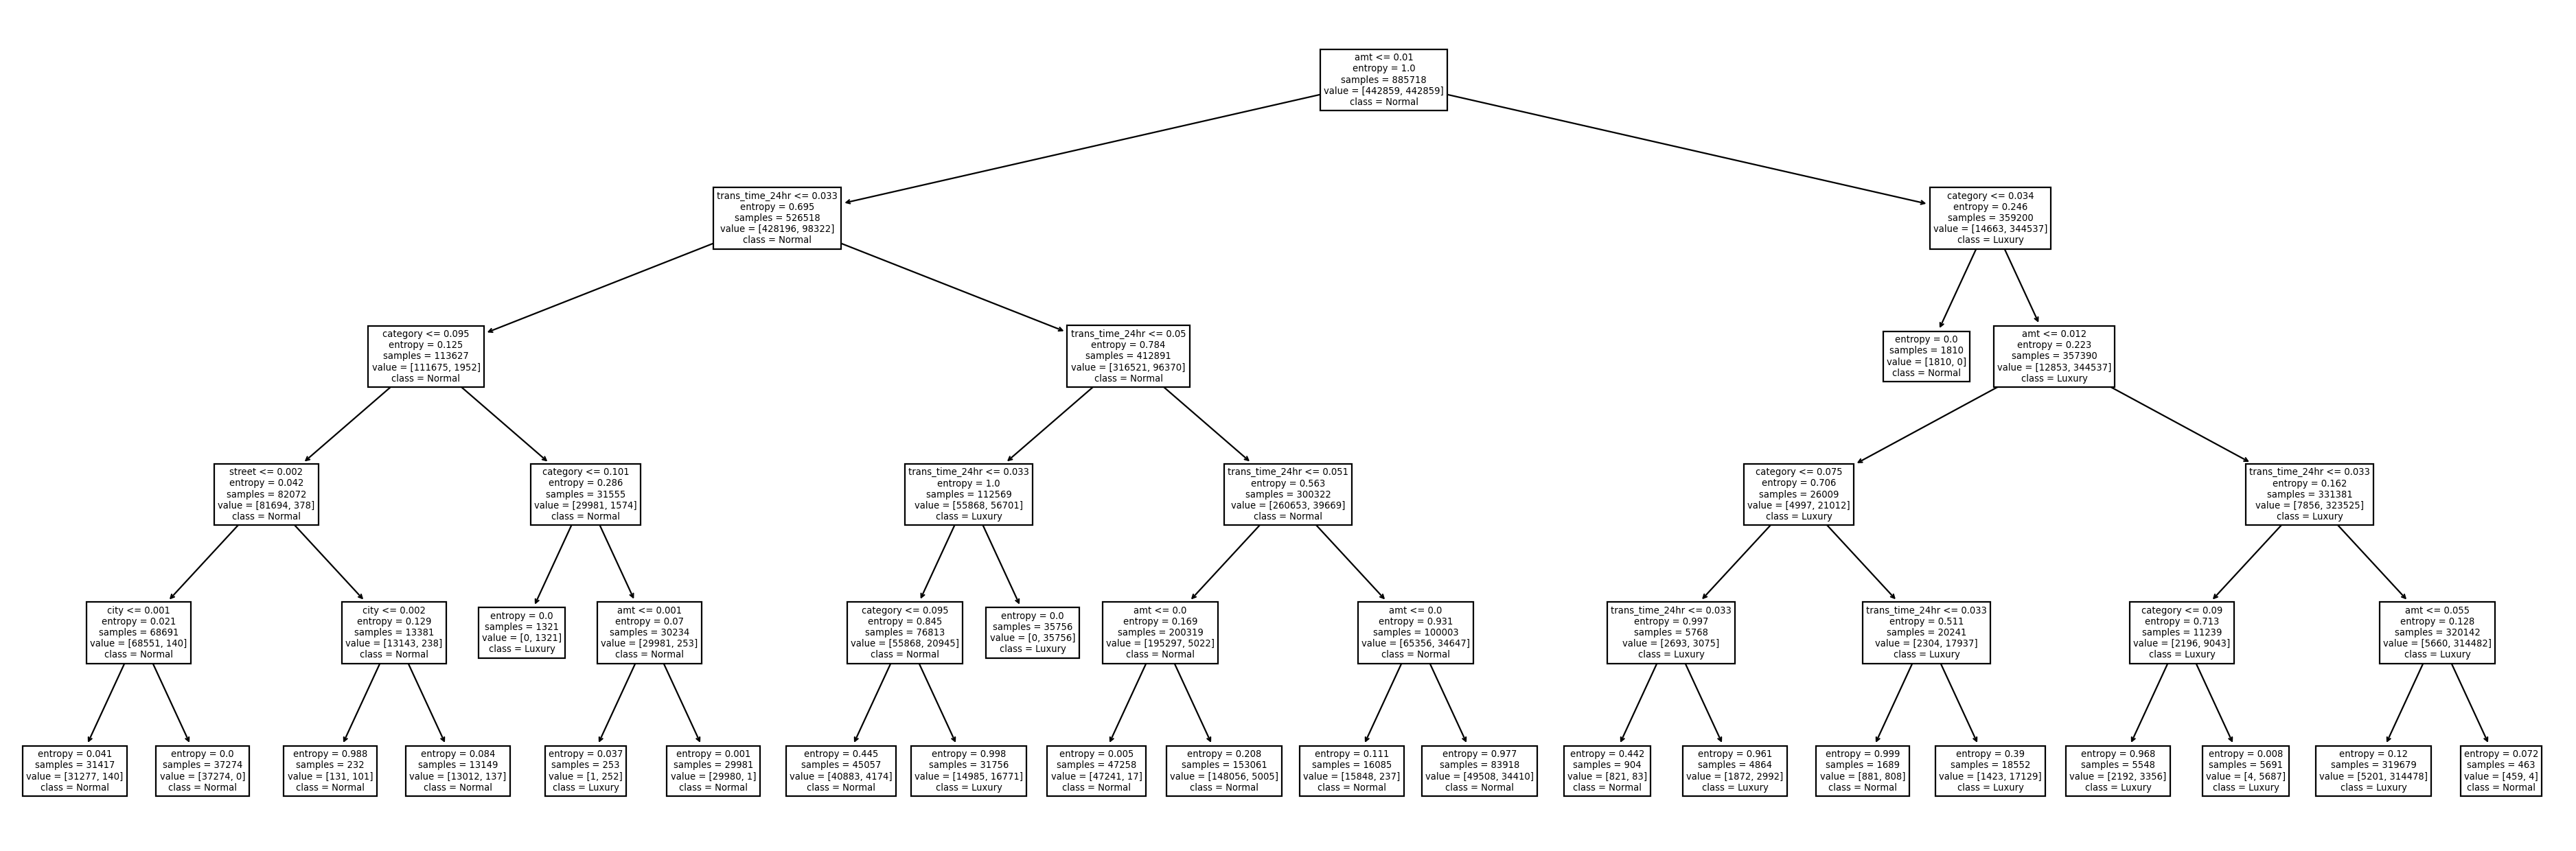

In [453]:
plt.figure(figsize=(30,10), dpi=160)
plot_tree(model_dt,feature_names=x_train_os.columns,class_names=['Normal','Luxury'])
plt.show()

In [454]:
y_pred_dt=model_dt.predict(x_test)

In [455]:
y_pred_dt

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [456]:
scores(y_test,y_pred_dt)

Confusion Matrix:
 [[104189   6526]
 [    89    340]]
Accuracy:  0.940482617145325
Recall:  0.7925407925407926
Precision:  0.04951937081270026
F1 score:  0.0932145305003427
Cohen Kappa Score: 0.08657784390040868
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.94      0.97    110715
           1       0.05      0.79      0.09       429

    accuracy                           0.94    111144
   macro avg       0.52      0.87      0.53    111144
weighted avg       1.00      0.94      0.97    111144



In [457]:
y_pred_dt_prob=model_dt.predict_proba(x_test)[:,1]

In [458]:
y_pred_dt_prob

array([1.04190433e-02, 4.45618614e-03, 9.83730555e-01, ...,
       3.33544578e-05, 5.28120670e-01, 9.26382138e-02])

In [459]:
y_preddt_30=np.where(y_pred_dt_prob>0.3,1,0)

In [460]:
scores(y_test,y_preddt_30)

Confusion Matrix:
 [[91574 19141]
 [   38   391]]
Accuracy:  0.8274400777369898
Recall:  0.9114219114219114
Precision:  0.02001843129223838
F1 score:  0.03917639396823807
Cohen Kappa Score: 0.03186327936996447
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.83      0.91    110715
           1       0.02      0.91      0.04       429

    accuracy                           0.83    111144
   macro avg       0.51      0.87      0.47    111144
weighted avg       1.00      0.83      0.90    111144



In [487]:
# 91574/(91574+19141)

In [480]:
# Recall
r=391/(391+38)

In [481]:
# Precision
p=391/(391+19141)

In [483]:
# F1_Score
f1s=(2*r*p)/(r+p)

In [484]:
f1s

0.03917639396823807

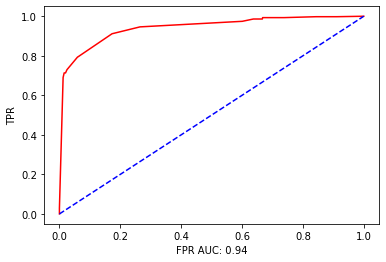

In [461]:
roc_new(y_test,y_pred_dt_prob)

#### YOUDEN's Index on Decision Tree

In [463]:
fpr,tpr,thres=roc_curve(y_test,y_pred_dt_prob)

In [464]:
ft_data=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thres':thres,'Youden':tpr-fpr})

In [465]:
ft_data.sort_values(by='Youden', ascending=False)

,FPR,TPR,Thres,Youden
10,0.172885,0.911422,0.410043,0.738537
8,0.060958,0.794872,0.478390,0.733913
9,0.061256,0.794872,0.435345,0.733615
7,0.058944,0.792541,0.528121,0.733597
6,0.024811,0.729604,0.604903,0.704792
4,0.015590,0.713287,0.923297,0.697697
5,0.020042,0.713287,0.615132,0.693244
11,0.265267,0.946387,0.092638,0.681120
12,0.267091,0.946387,0.091814,0.679296
3,0.012121,0.689977,0.983731,0.677855


In [466]:
y_pred_dt_73=np.where(y_pred_dt_prob>0.73,1,0)

In [467]:
scores(y_test,y_pred_dt_73)

Confusion Matrix:
 [[108989   1726]
 [   123    306]]
Accuracy:  0.9833639242784136
Recall:  0.7132867132867133
Precision:  0.15059055118110237
F1 score:  0.24867939861844782
Cohen Kappa Score: 0.24385974625950857
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.98      0.99    110715
           1       0.15      0.71      0.25       429

    accuracy                           0.98    111144
   macro avg       0.57      0.85      0.62    111144
weighted avg       1.00      0.98      0.99    111144



# Ensemble Techniques

In [468]:
from sklearn.ensemble import RandomForestClassifier

In [469]:
model_rf=RandomForestClassifier(n_estimators=200,
                               criterion='entropy',
                               max_depth=3)

In [470]:
model_rf.fit(x_train_os,y_train_os)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200)

In [471]:
model_rf.score(x_test,y_test)

0.9603037500899734

In [472]:
y_pred_rf=model_rf.predict(x_test)

In [473]:
scores(y_test,y_pred_rf)

Confusion Matrix:
 [[106402   4313]
 [    99    330]]
Accuracy:  0.9603037500899734
Recall:  0.7692307692307693
Precision:  0.07107473616196425
F1 score:  0.13012618296529968
Cohen Kappa Score: 0.12393523839305043
Classification Summary:
                precision    recall  f1-score   support

           0       1.00      0.96      0.98    110715
           1       0.07      0.77      0.13       429

    accuracy                           0.96    111144
   macro avg       0.54      0.87      0.55    111144
weighted avg       1.00      0.96      0.98    111144



In [474]:
y_pred_rf_prob=model_rf.predict_proba(x_test)[:,1]

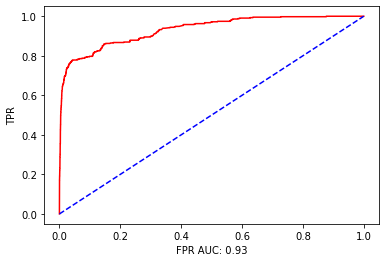

In [476]:
roc_new(y_test,y_pred_rf_prob)